In [1]:
from sklearn.datasets import load_linnerud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
data = load_linnerud()

In [3]:
data

{'data': array([[  5., 162.,  60.],
        [  2., 110.,  60.],
        [ 12., 101., 101.],
        [ 12., 105.,  37.],
        [ 13., 155.,  58.],
        [  4., 101.,  42.],
        [  8., 101.,  38.],
        [  6., 125.,  40.],
        [ 15., 200.,  40.],
        [ 17., 251., 250.],
        [ 17., 120.,  38.],
        [ 13., 210., 115.],
        [ 14., 215., 105.],
        [  1.,  50.,  50.],
        [  6.,  70.,  31.],
        [ 12., 210., 120.],
        [  4.,  60.,  25.],
        [ 11., 230.,  80.],
        [ 15., 225.,  73.],
        [  2., 110.,  43.]]),
 'feature_names': ['Chins', 'Situps', 'Jumps'],
 'target': array([[191.,  36.,  50.],
        [189.,  37.,  52.],
        [193.,  38.,  58.],
        [162.,  35.,  62.],
        [189.,  35.,  46.],
        [182.,  36.,  56.],
        [211.,  38.,  56.],
        [167.,  34.,  60.],
        [176.,  31.,  74.],
        [154.,  33.,  56.],
        [169.,  34.,  50.],
        [166.,  33.,  52.],
        [154.,  34.,  64.],
        

In [4]:
df_features = data.feature_names
df_features

['Chins', 'Situps', 'Jumps']

In [5]:
df_data = pd.DataFrame(data.data, columns = df_features)

In [6]:
df_data

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0
5,4.0,101.0,42.0
6,8.0,101.0,38.0
7,6.0,125.0,40.0
8,15.0,200.0,40.0
9,17.0,251.0,250.0


In [7]:
df_labels = pd.DataFrame(data.target, columns = ['Weight', 'Waist', 'Pulse'])
df_labels

,Weight,Waist,Pulse
0,191.0,36.0,50.0
1,189.0,37.0,52.0
2,193.0,38.0,58.0
3,162.0,35.0,62.0
4,189.0,35.0,46.0
5,182.0,36.0,56.0
6,211.0,38.0,56.0
7,167.0,34.0,60.0
8,176.0,31.0,74.0
9,154.0,33.0,56.0


In [8]:
data = pd.concat([df_data, df_labels], axis=1)
data

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


In [9]:
data.columns

Index(['Chins', 'Situps', 'Jumps', 'Weight', 'Waist', 'Pulse'], dtype='object')

In [10]:
df2 = pd.concat([data['Chins'], data['Situps'], data['Jumps'], data['Weight']], axis=1)
df2

,Chins,Situps,Jumps,Weight
0,5.0,162.0,60.0,191.0
1,2.0,110.0,60.0,189.0
2,12.0,101.0,101.0,193.0
3,12.0,105.0,37.0,162.0
4,13.0,155.0,58.0,189.0
5,4.0,101.0,42.0,182.0
6,8.0,101.0,38.0,211.0
7,6.0,125.0,40.0,167.0
8,15.0,200.0,40.0,176.0
9,17.0,251.0,250.0,154.0


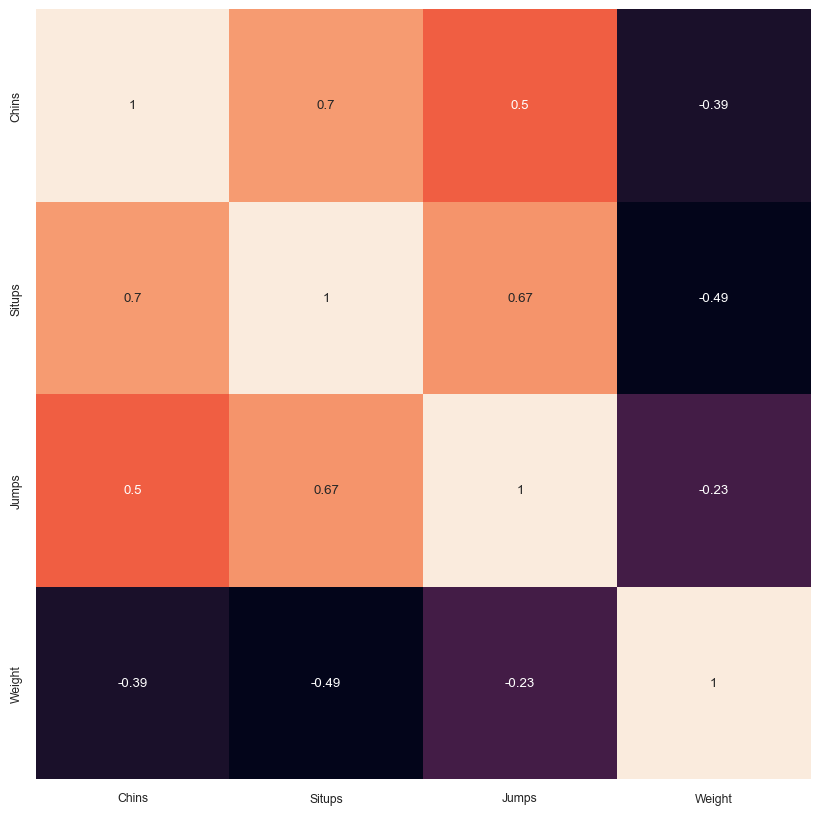

In [11]:
df_corr = df2.corr()

plt.figure(figsize = (10,10))
sns.set(font_scale = 0.8)
sns.heatmap(df_corr, annot = True, cbar = False)
plt.show()

array([[<AxesSubplot:xlabel='Chins', ylabel='Chins'>,
        <AxesSubplot:xlabel='Situps', ylabel='Chins'>,
        <AxesSubplot:xlabel='Jumps', ylabel='Chins'>,
        <AxesSubplot:xlabel='Weight', ylabel='Chins'>],
       [<AxesSubplot:xlabel='Chins', ylabel='Situps'>,
        <AxesSubplot:xlabel='Situps', ylabel='Situps'>,
        <AxesSubplot:xlabel='Jumps', ylabel='Situps'>,
        <AxesSubplot:xlabel='Weight', ylabel='Situps'>],
       [<AxesSubplot:xlabel='Chins', ylabel='Jumps'>,
        <AxesSubplot:xlabel='Situps', ylabel='Jumps'>,
        <AxesSubplot:xlabel='Jumps', ylabel='Jumps'>,
        <AxesSubplot:xlabel='Weight', ylabel='Jumps'>],
       [<AxesSubplot:xlabel='Chins', ylabel='Weight'>,
        <AxesSubplot:xlabel='Situps', ylabel='Weight'>,
        <AxesSubplot:xlabel='Jumps', ylabel='Weight'>,
        <AxesSubplot:xlabel='Weight', ylabel='Weight'>]], dtype=object)

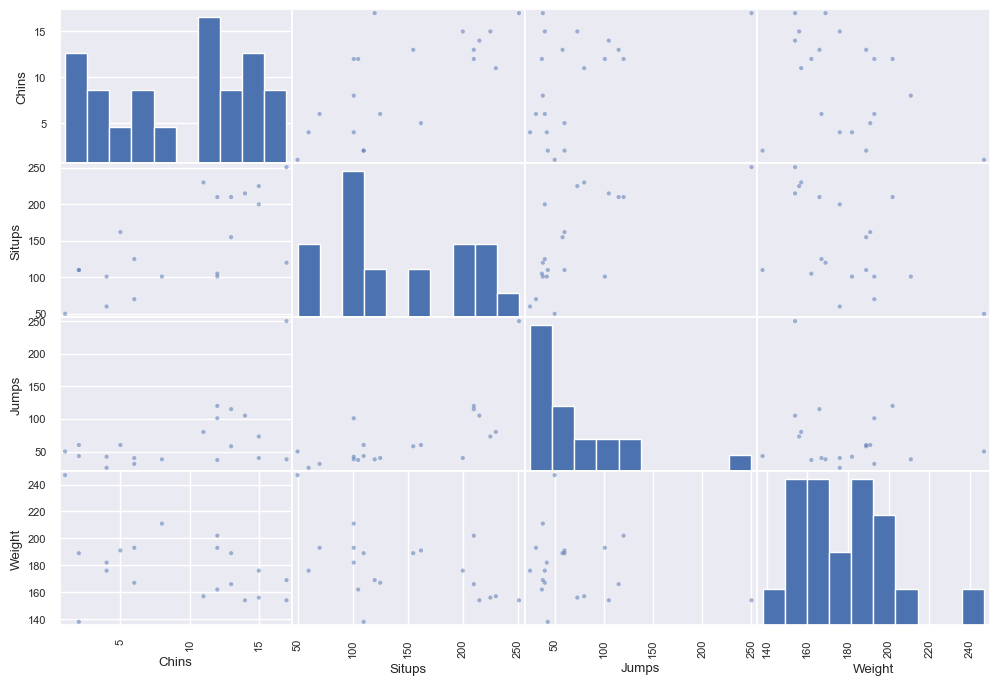

In [12]:
from pandas.plotting import scatter_matrix

attributes = ['Chins', 'Situps', 'Jumps', 'Weight']
scatter_matrix(data[attributes], figsize = (12,8))

In [14]:
corr_matrix = data.corr()
corr_matrix['Weight'].sort_values(ascending=False)

Weight    1.000000
Waist     0.870243
Jumps    -0.226296
Pulse    -0.365762
Chins    -0.389694
Situps   -0.493084
Name: Weight, dtype: float64

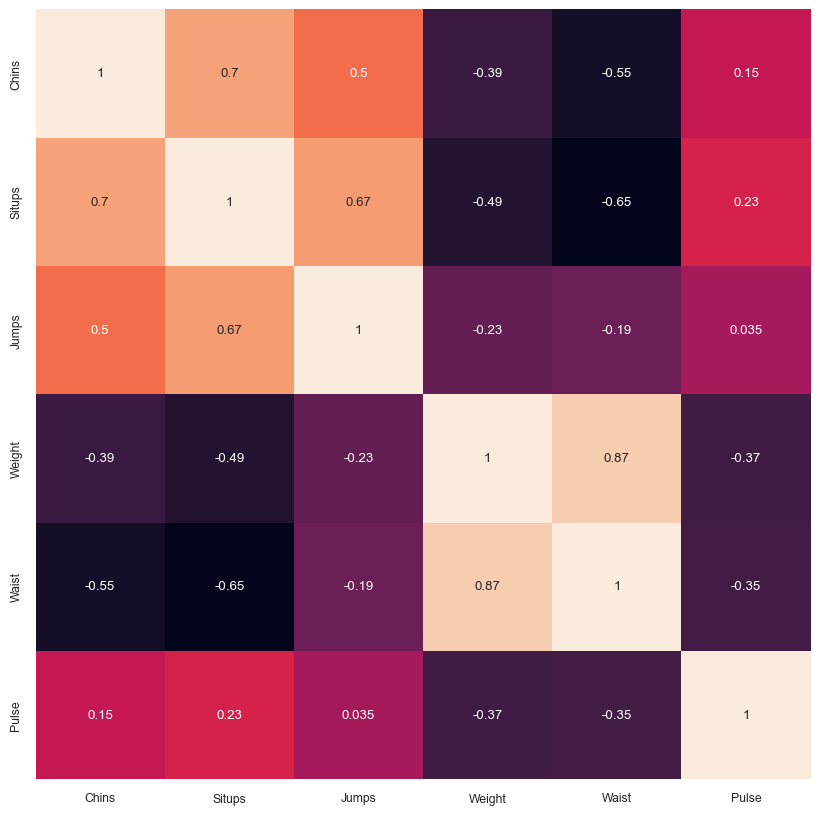

In [13]:
df_corr = data.corr()

plt.figure(figsize = (10,10))
sns.set(font_scale = 0.8)
sns.heatmap(df_corr, annot = True, cbar = False)
plt.show()

In [15]:
corr_matrix = data.corr()
corr_matrix['Waist'].sort_values(ascending=False)

Waist     1.000000
Weight    0.870243
Jumps    -0.191499
Pulse    -0.352892
Chins    -0.552232
Situps   -0.645598
Name: Waist, dtype: float64

In [17]:
corr_matrix = data.corr()
corr_matrix['Pulse'].sort_values(ascending=False)

Pulse     1.000000
Situps    0.225038
Chins     0.150648
Jumps     0.034933
Waist    -0.352892
Weight   -0.365762
Name: Pulse, dtype: float64

In [18]:
df2.head()

,Chins,Situps,Jumps,Weight
0,5.0,162.0,60.0,191.0
1,2.0,110.0,60.0,189.0
2,12.0,101.0,101.0,193.0
3,12.0,105.0,37.0,162.0
4,13.0,155.0,58.0,189.0


In [21]:
df2.isna().sum()

Chins     0
Situps    0
Jumps     0
Weight    0
dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
from sklearn.model_selection import train_test_split

x_data=df2.loc[:, ['Chins', 'Situps', 'Jumps']]
y_data=df2.loc[:, ['Weight']]
X_train, X_test, y_train, y_test=train_test_split(x_data,
                                                  y_data,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16, 3) (16, 1)
(4, 3) (4, 1)


In [26]:
X_train.head()

,Chins,Situps,Jumps
14,6.0,70.0,31.0
16,4.0,60.0,25.0
10,17.0,120.0,38.0
8,15.0,200.0,40.0
5,4.0,101.0,42.0


In [27]:
y_train.head()

,Weight
14,193.0
16,176.0
10,169.0
8,176.0
5,182.0


In [28]:
lr = LinearRegression()

In [29]:
lr.fit(X_train, y_train)

LinearRegression()

In [30]:
y_preds = lr.predict(X_test)
print(X_train.shape, X_test.shape)

(16, 3) (4, 3)


In [31]:
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, y_preds):.3f}')

MSE : 1559.793, RMSE: 39.494
Variance score : 0.115


In [32]:
print("절편 값:", lr.intercept_) # y축 절편값

# 회귀 계수(coefficient) : 독립변수의 변화에 따라 종속변수에 미치는 영향력이 크기
print("회귀계수:", np.round(lr.coef_,1))

절편 값: [200.65050193]
회귀계수: [[-1.  -0.1  0.2]]


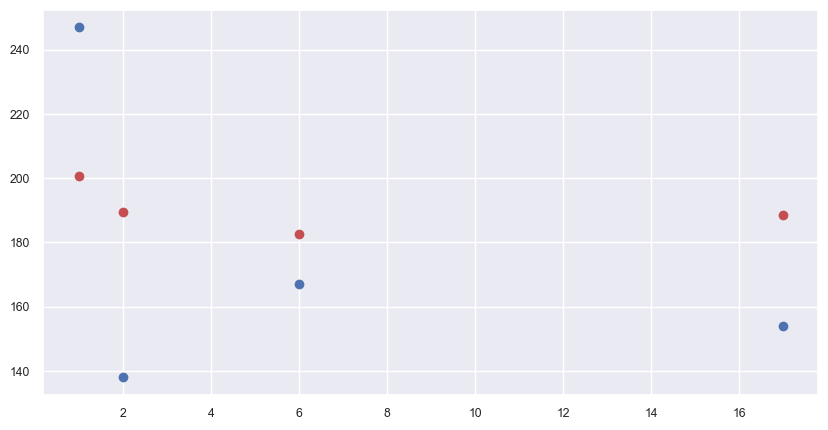

In [38]:
y_test_pred=lr.predict(X_test)

plt.figure(figsize=(10,5))
plt.scatter(X_test['Chins'], y_test, label='y_test')
plt.scatter(X_test['Chins'], y_test_pred, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()  

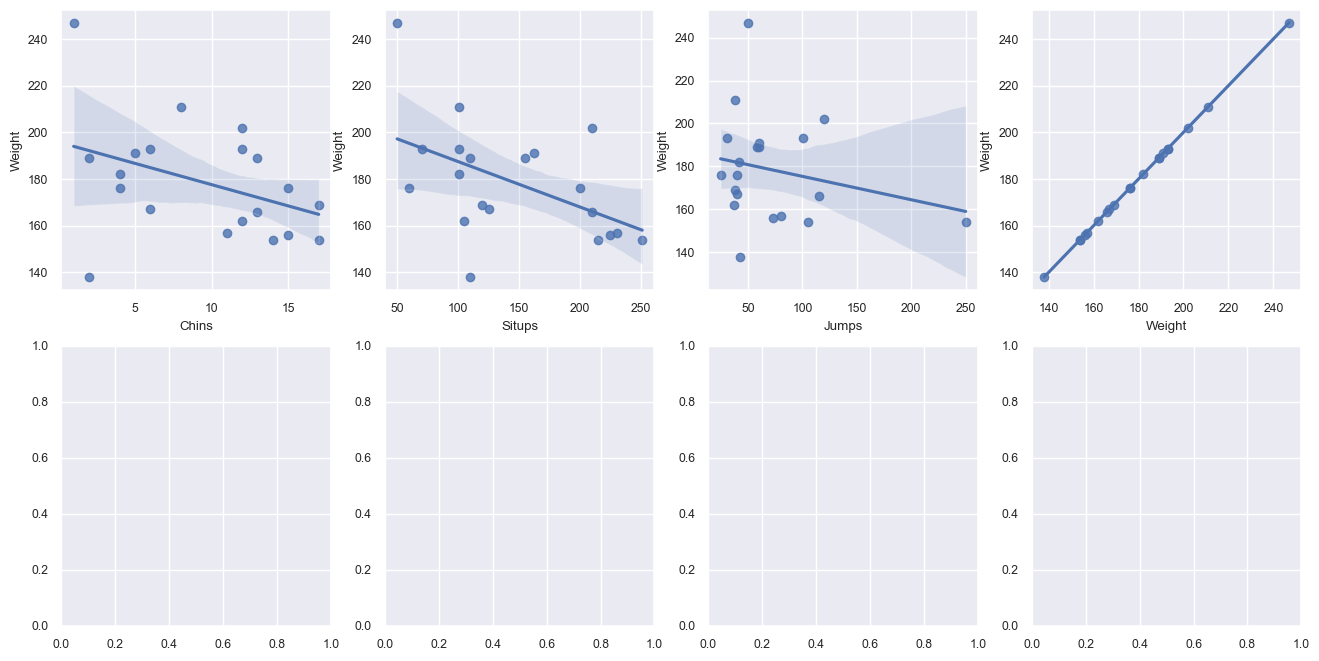

In [61]:
ig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

lm_features = ['Chins', 'Situps', 'Jumps','Weight']

# i에는 인덱스가 feature에는 RM ~ RAD까지 순차적으로 들어감
for i, feature in enumerate(lm_features):
    row = int(i/4) # 2행
    col = i%4

    # sns.regplot : 회귀직선을 그려줌
    sns.regplot(x=feature, y='Weight', data=df2, ax=axs[row][col])